In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import wget

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df['target'] = iris.target

In [6]:
df['flower'] = df['target'].apply(lambda x : iris.target_names[x])

In [7]:
df.columns = df.columns.str.replace('(','').str.replace(')','').str.replace(' ','_')

In [8]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


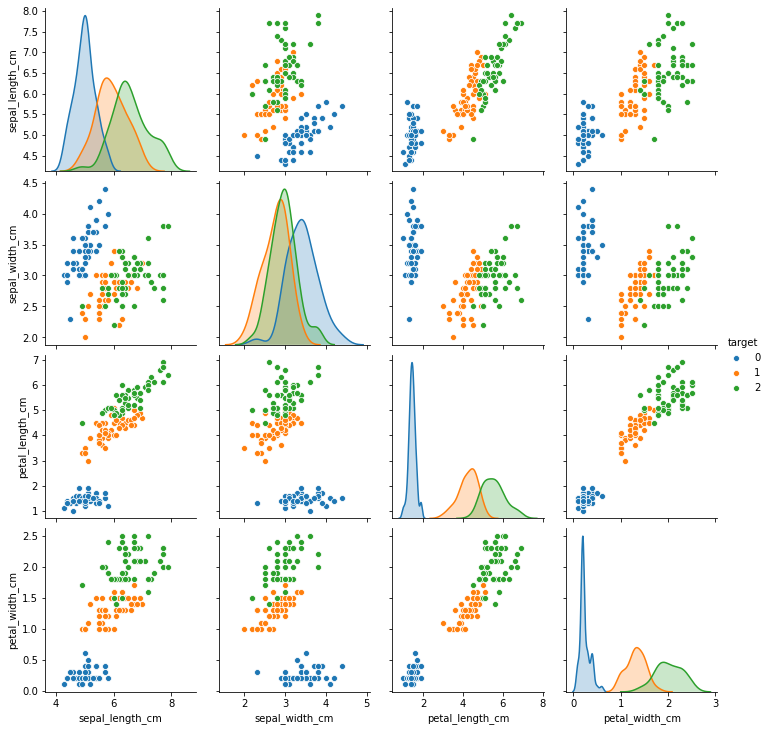

In [9]:
sns.pairplot(df, hue='target')

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
X = df.drop(columns=['target','flower'])

In [12]:
y = df['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
svector = SVC()

In [15]:
svector.fit(X_train, y_train)

SVC()

In [16]:
y_pred = pd.Series(svector.predict(X_test))

In [17]:
svector.score(X_test, y_test)

1.0

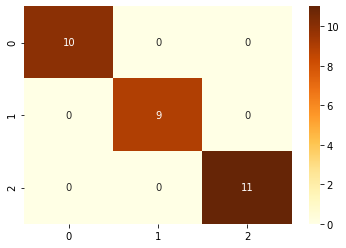

In [18]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='YlOrBr')

#### Exercise

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

In [20]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [21]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [22]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target

In [23]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [24]:
X = df.drop(columns=['target'])
y = df['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kitem in kernels:
    svector= SVC(kernel=kitem)
    svector.fit(X_train, y_train)
    y_pred = svector.predict(X_test)
    print(svector.score(X_test, y_test))

0.9777777777777777
0.9916666666666667
0.9861111111111112
0.9


In [27]:
regs = [1, 5, 10, 25, 50, 75, 100, 500, 1000]
for ritem in regs:
    svector= SVC(C=ritem)
    svector.fit(X_train, y_train)
    y_pred = svector.predict(X_test)
    print(svector.score(X_test, y_test))

0.9861111111111112
0.9888888888888889
0.9861111111111112
0.9861111111111112
0.9861111111111112
0.9861111111111112
0.9861111111111112
0.9861111111111112
0.9861111111111112


In [28]:
gammas = ['scale','auto']
for gitem in gammas:
    svector= SVC(gamma=gitem)
    svector.fit(X_train, y_train)
    y_pred = svector.predict(X_test)
    print(svector.score(X_test, y_test))

0.9861111111111112
0.4666666666666667


Maximum Score: 0.992 for kernel poly with regularization: 1 and gamma: scale


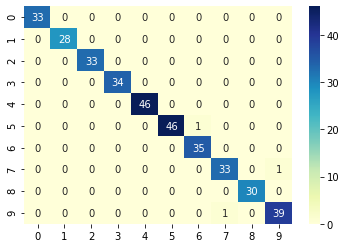

In [29]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
regs = range(1,5)
gammas = ['scale','auto']
max_score = 0
for kitem in kernels:
    for ritem in regs:
        for gitem in gammas:
            svector= SVC(C=ritem, kernel=kitem, gamma=gitem)
            svector.fit(X_train, y_train)
            y_pred = svector.predict(X_test)
            score = svector.score(X_test, y_test)
            if score > max_score:
                max_score = score
                high_k = kitem
                high_r = ritem
                high_g = gitem
                cm = metrics.confusion_matrix(y_test, y_pred)
print('Maximum Score: {:.3f} for kernel {} with regularization: {} and gamma: {}'.format(max_score, high_k, high_r, high_g))
sns.heatmap(cm, annot=True, cmap='YlGnBu')